# Kings County Housing Data Analysis:
## Linear regression prediction of housing prices secondary to housing characteristics 

![King's Conty, Washington](https://d33a4decm84gsn.cloudfront.net/search/2019/places-to-live/counties/king-county-wa_1910.png)

### Packages utilized for this analysis are as follows:

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab 
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

### Orginial Dataset 

In [2]:
#Original Dataset
df = pd.read_csv('kc_house_data.csv')

### Data Analysis
On inspection of raw data, the following was noted:
* Out of 23 data columns, 3 contained null values
    * waterfront, view, and yr.renovated
* the id column contained numerous duplications
* the lat column consisted of inconsistent decimal significant figures
* the sqft_basement column contained a significant numner of "?" in place of numerical data
* Several columns consisted of categorical data
    * waterfront, view, condition, and grade
* A few significant outliyers
    * One home in the bedroom column had 33 bedrooms
    * One home had 7.5 bathroom

In [3]:
df.head() #view of first 5 rows of data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dataset cleaning prior to analysis:

In [6]:
# All "?" in sqft_basement column replaced with null values
df = df.replace('?' , np.nan)

# A new data column was created by taking each value in 'yr_built' and subtracting from the current year 2019
df['age'] = 2019-df['yr_built']

#In order to provide more manageable values, 'price was divided by 1000, converting 'price' to thousands ($)
df['price1000'] = df['price']/1000

#Due to the large spread of data, and the substantially increased variance as 'price' approached millions,
#the dataset 'price' was capped at 1,000,000 ie 'price' would include only homes valued at under 1 million dollars
df_Mill = df.loc[df['price'] < 1000000]


### Running the regression model

From our regression model, with 'price1000' as the dependent/target variable and explanatory variables of 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age',
we obtained an R squared value was 0.551. 

In [14]:
#Regression Model
X = df_Mill[['sqft_living', 'bathrooms', 'floors', 'grade', 'sqft_living15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_Mill['price1000']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price1000   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     4058.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        13:30:33   Log-Likelihood:            -1.2663e+05
No. Observations:               20107   AIC:                         2.533e+05
Df Residuals:                   20100   BIC:                         2.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -663.4939      9.899    -67.026      0.000    -682.897    -644.091
sqft_living       0.0511      0.002     22.061      0.000       0.047       0.056
bathrooms        29.7995      2.182     13.655      0.000      25.522      34.077
floors           39.1622      2.166     18.081      0.000      34.917      43.408
grade            89.8342      1.465     61.333      0.000      86.963      92.705
sqft_living15     0.0541      0.002     22.374      0.000       0.049       0.059
age               2.8027      0.042     66.566      0.000       2.720       2.885
==============================================================================
Omnibus:                      431.653   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.746
Skew:                           0.323   Prob(JB):                    2.73e-107
Kurtosis:                       3.411   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our Model ran with all explanatory variables in the X dataframe, and the target variable (House price in thousands of dollars) in the Y dataframe. All explanatory variables are significant.

### Testing Distribution of Residuals
A Q-Q plot was done, illustrating that our model residuals were normally distributed

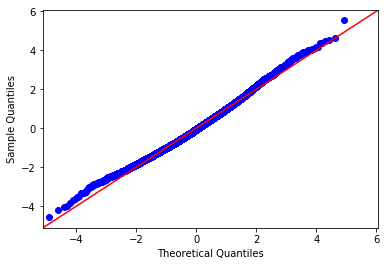

In [8]:
#Residual Plot
residuals = model.resid
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

### Training and testing the data

In [15]:
#Train and test
X = df_Mill[['sqft_living', 'bathrooms', 'floors', 'grade', 'sqft_living15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_Mill['price1000']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16085, 6) (16085,)
(4022, 6) (4022,)


We performed a 5-fold split of our dataset with 80% of the data in training and 20% of the data in testing.

### Fitting the model

In [17]:
#fit model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Below is a visualization of our prediction line from the training data compared to the testing data.

/Users/Mango/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


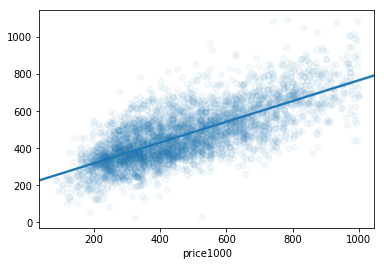

In [18]:
sns.regplot(y_test, y=predictions, scatter_kws={'alpha':0.05});

We used Root Mean Squared Error to evaluate model performance.  On average, our trained regression model mis-estimated the true values of homes in the test data by $130,000.

In [19]:
#Import Metric Analysis Pacakge
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
#On Average our model missed each data point by $134,000
metrics.mean_squared_error(y_test, predictions)**0.5

131.31093532484743

### Final Conclusions and Thoughts

* Significance and usefullness of our model
    * 
* Areas of error and weakness
    *